In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.fft import fft, ifft

# Problem 1

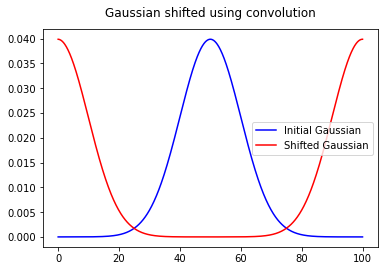

In [2]:
def gaussian(x,mu,sigma):
    ''' Quickly write a function that returns a Gaussian '''
    return 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-(x-mu)**2/(2*sigma**2))


def conv(f, shift, xrange):
    ''' Shift a function f by an amount shift.
    g is a delta function centered on the shift.
    xrange is the range of the x-axis (to find the index of the shift)'''
    
    g = 0*f
    idx = int(np.size(f)/(xrange/shift))  # Get the index corresponding to the shift
    g[idx] = 1
    
    ft1 = fft(f)
    ft2 = fft(g)
    
    return np.real(ifft(ft1*ft2))


#---------- Test it out using a Gaussian centered on the center of some array ----------------------


x = np.linspace(0,100,1001)
mu = np.median(x)  # It is centered on the array midpoint
sigma = 10
gaus = gaussian(x,mu,sigma)

plt.plot(x, gaus, color='blue', label="Initial Gaussian")


#- ------------------ Shift the Gaussian -------------------------------------------------------------


# Define half the array length
half = 1/2 * (max(x)-min(x))

shifted_gaus = conv(gaus, half, xrange=max(x)-min(x))

plt.plot(x, shifted_gaus, color='red', label="Shifted Gaussian")
plt.legend()
plt.title("Gaussian shifted using convolution",y=1.03)
plt.savefig("gauss_shift.png",dpi=500,bbox_inches='tight')

plt.show()

# Problem 2

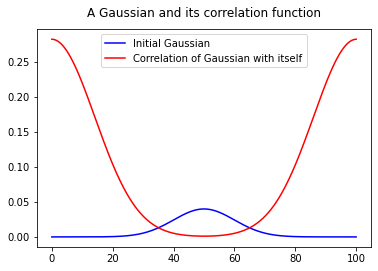

In [11]:
def correlation(f,g):
    ''' Take correlation function of f and g '''
    ft1 = fft(f)
    ft2 = np.conj(fft(g))
    
    return np.real(ifft(ft1*ft2))


# ------------ Take correlation of Gaussian with itself ----------------------------

corr = correlation(gaus,gaus)

plt.plot(x, gaus, color='blue', label="Initial Gaussian")
plt.plot(x, corr, color='red', label="Correlation of Gaussian with itself")
plt.legend()
plt.title("A Gaussian and its correlation function",y=1.03)
plt.savefig("gauss_corr.png",dpi=500,bbox_inches='tight')
plt.show()

# Problem 3